In [492]:
import sys
sys.path.append("../../function/")
import trajDiff_v143 as trajDiff
milo2=trajDiff.Milo2()

In [547]:
import PyComplexHeatmap as pch

## continue with core of 1.11_injury.ipynb

In [425]:
mes_bool=extendAtlas.obs["lineage_mesenchyme"]==True

In [426]:
mesAtlas=extendAtlas[mes_bool]

In [427]:
new_labels = np.where(np.isin(mesAtlas.obs["Stage"], ['Injury(5-FU)', 'Injury(Non-Regeneration)', 'Injury(Radiation)', 'Injury(Regeneration)']),
                      'Injury', 'Other')

In [428]:
mesAtlas.obs["InjuryState"]=new_labels

/tmp/ipykernel_1573039/664343754.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  mesAtlas.obs["InjuryState"]=new_labels
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/contextlib.py:124: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


In [522]:
cellCount=mesAtlas.obs.groupby("Sample").size()

In [536]:
selectSample=cellCount[cellCount>500].index

In [525]:
np.sum(cellCount>1000)

48

In [519]:
mesAtlas.obs["Sample"]

Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0_1_1            Suture2021_Farmer_E17
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0_1_1            Suture2021_Farmer_E17
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0_1_1            Suture2021_Farmer_E17
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0_1_1            Suture2021_Farmer_E17
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0_1_1            Suture2021_Farmer_E17
                                                                ...              
TTTCCTCGTGAAGCGT-1_8                                LimbG610C_Gorrell_calvariaWT4
TTTCGATTCGCTGACG-1_8                                LimbG610C_Gorrell_calvariaWT4
TTTCGATTCTCATTGT-1_8                                LimbG610C_Gorrell_calvariaWT4
TTTCGATTCTCCCATG-1_8                                LimbG610C_Gorrell_calvariaWT4
TTTGTTGAGGAATGTT-1_8                                LimbG610C_Gorrell_calvariaWT4
Name: Sample, Length: 147808, dtype: category
Categories (302, object): ['Ablation_Matsushita_abl7

In [432]:
mdata = milo2.load(mesAtlas)

In [433]:
sc.pp.neighbors(mdata['rna'], use_rep='scANVI', n_neighbors=300, n_pcs=15)

In [434]:
milo2.make_nhoods(mdata['rna'], prop=0.015)


In [435]:
mdata = milo2.count_nhoods(mdata, sample_col="Sample")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [443]:
milo2.make_null(mdata, design='~InjuryState',model_contrasts='InjuryStateInjury-InjuryStateOther',times=20)

 19%|█▉        | 124/644 [1126:09:05<4722:34:14, 32694.72s/it]


In [445]:
milo2.da_nhoods(mdata, design='~InjuryState',model_contrasts='InjuryStateInjury-InjuryStateOther')

In [446]:
mdata

MuData object with n_obs × n_vars = 147808 × 20664
  3 modalities
    rna:	147808 x 20664
      obs:	'Sample', 'Project', 'Core Dataset', 'Limb Atlas', 'Cranial Atlas', 'Organ', 'Tissue', 'Tissue(Specific)', 'Stage', 'Gene type', 'Treatment', 'Age', 'Age(In Detail)', 'Machine', 'Species', 'Isolation approach', 'Digestion', 'Enzymes', 'Cre', 'Bone Forming Methods', 'Data Source', 'Related Assay', 'Cell Count After QC', 'Origin', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'nCount_originalexp', 'nFeature_originalexp', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'batch', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'transf_ann_level_7_label', 'transf_ann_level_6_label', 'transf_ann_level_5_label', 'transf_ann_level_4_label', 'transf_ann_level_3_label', 'transf_ann_level_2_label', 'transf_ann_level_1_label', 'most_confident_level', 'most_confident_uncert', 'most_confident_label', 'transf_ann_level_5_uncert', 'transf_ann_level_4_uncert', 'transf_ann_level_3_uncert', 'transf_ann_level_2_uncert', 'transf_ann_level_1_uncert', 'transf_ann_level_7_uncert', 'transf_ann_level_6_uncert', 'osteoIndex', 'Age_num', 'Age_detail_num', 'leiden_clusters_0.5', 'update_level2', 'C7_named', 'leiden_clusters_4', 'lineage_chondro', 'lineage_laFibro', 'lineage_lepr', 'lineage_mesenchyme', 'dpt_pred', 'lineage', 'lineage_str', 'Cell', 'InjuryState', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
      var:	'features', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'Age_colors', 'hvg', 'log1p', 'transf_ann_level_2_label_colors', 'C7_named_colors', 'neighbors', 'nhood_neighbors_key'
      obsm:	'X_umap', 'scANVI', 'nhoods'
      layers:	'counts'
      obsp:	'distances', 'connectivities'
    milo:	302 x 1984
      obs:	'InjuryState', 'Sample'
      var:	'index_cell', 'kth_distance', 'null', 'group1_cpm', 'group2_cpm', 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'SpatialFDR'
      uns:	'sample_col'
    pseudobulk:	0 x 0

In [493]:
milo2.make_range(mdata,time_col="dpt_pred")

In [494]:
lenDf=milo2.permute_test_point(mdata,n=100,include_null=True)

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
../../function/trajDiff_v143.py:747: RuntimeWarning: invalid value encountered in scalar divide
  permute_null[i]=np.sum(null_true_list)/(len(null_false_list)+len(null_true_list))
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
../../function/trajDiff_v143.py:747: RuntimeWarning:

(array([503., 448., 436.,  93., 182., 187.,  87.,  24.,  15.,   9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

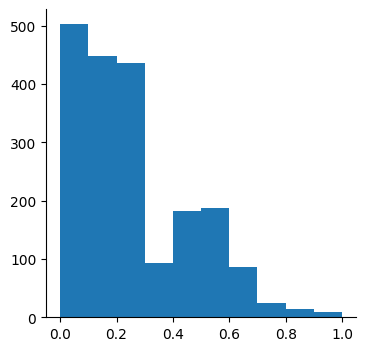

In [469]:
plt.hist(mdata["milo"].var[["null"]])

In [495]:
lenDf[1:10]

,true,false,meanLogChange,null,rate
1,0.0,0.0,NaN,NaN,NaN
2,0.0,0.0,NaN,NaN,NaN
3,9.0,0.0,-27.471266,0.238889,1.000000
4,11.0,1.0,-26.010051,0.216667,0.916667
5,23.0,2.0,-25.411124,0.268000,0.920000
6,46.0,3.0,-26.040018,0.300000,0.938776
7,73.0,11.0,-24.749514,0.264286,0.869048
8,179.0,50.0,-21.078863,0.330131,0.781659
9,267.0,136.0,-17.426505,0.295906,0.662531


In [ ]:
varTable[["range_down","range_up","Accept","logChange","null"]]

In [496]:
lenDf=milo2.test_binom(lenDf)

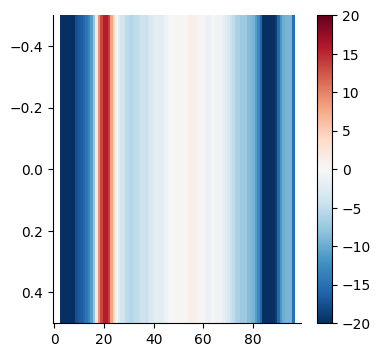

In [497]:
y_values = pd.DataFrame(lenDf['meanLogChange']).T
plt.imshow(y_values, cmap='RdBu_r', interpolation='nearest',vmax=20,vmin=-20, aspect='auto')

# Add colorbar
plt.colorbar()

In [460]:
lenDf

,true,false,meanLogChange,null,rate,binom_p
0,0.0,0.0,NaN,NaN,NaN,1.0
1,0.0,0.0,NaN,NaN,NaN,1.0
2,0.0,0.0,NaN,NaN,NaN,1.0
3,9.0,0.0,-27.471266,inf,1.000000,NaN
4,11.0,1.0,-26.010051,inf,0.916667,NaN
...,...,...,...,...,...,...
95,2.0,3.0,-9.242456,inf,0.400000,NaN
96,1.0,0.0,-14.929884,inf,1.000000,NaN
97,0.0,0.0,NaN,NaN,NaN,1.0
98,0.0,0.0,NaN,NaN,NaN,1.0


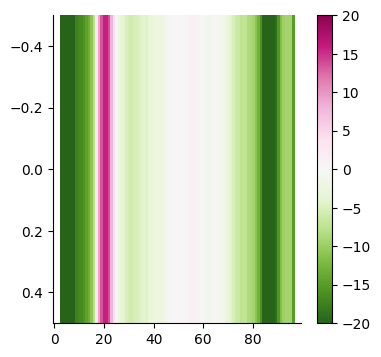

In [452]:
y_values = pd.DataFrame(lenDf['meanLogChange']).T
plt.imshow(y_values, cmap='PiYG_r', interpolation='nearest',vmax=20,vmin=-20, aspect='auto')

# Add colorbar
plt.colorbar()

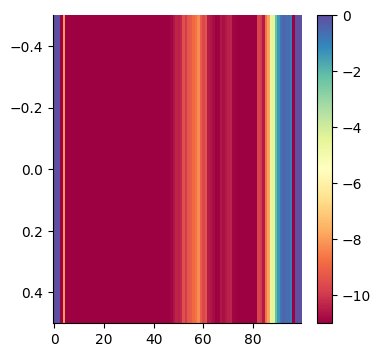

In [498]:
y_values = pd.DataFrame(lenDf['binom_p']).T
y_values=np.log10(y_values+0.00000000001)
plt.imshow(y_values, cmap='Spectral', interpolation='nearest',aspect='auto')

# Add colorbar
plt.colorbar()

In [454]:
y_values

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
binom_p,4.342945e-12,4.342945e-12,4.342945e-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.342945e-12,4.342945e-12,4.342945e-12


In [499]:
wholecpm=milo2.make_da_cpm(mdata)

In [503]:
varTable=mdata['milo'].var
range_data=varTable[["range_down","range_up"]].values

In [509]:
range_data.shape

(1984, 2)

In [507]:
 np.sum((0.5 >= range_data[:, 0]) & (0.5 <= range_data[:, 1]))

106

In [511]:
n=100
permute_point_group={}
for j in range(n):
    point=(j+1)/(n+1)
    mask = (point >= range_data[:, 0]) & (point <= range_data[:, 1])
    group1Array=wholecpm.loc[mask,:]
    group1Mean=np.mean(group1Array,axis=0)
    permute_point_group[j]=group1Mean
groupDf=pd.DataFrame(permute_point_group)
groupDf.columns=groupDf.columns.astype("str")


In [538]:
groupDf.loc[selectSample]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Sample,,,,,,,,,,,,,,,,,,,,,
BmscSp7KO_Youlten_WT,NaN,NaN,NaN,283.588396,212.691297,272.244860,260.438323,222.819454,152.320405,409.549495,...,9571.108360,9868.876176,11910.712626,11910.712626,11910.712626,13101.783889,6806.121501,NaN,NaN,NaN
CalvariaP4_Ayturk,NaN,NaN,NaN,108.419479,81.314609,156.124050,159.310255,151.012846,123.569799,234.864033,...,58546.518761,66352.721263,75256.670991,83359.090998,83359.090998,77281.404765,63425.395325,NaN,NaN,NaN
CranioSoxc_Angelozzi_Prx1CreE11.5,NaN,NaN,NaN,233.667816,262.876293,1135.625588,1748.932075,2979.264659,3009.876163,2618.326158,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
CranioSoxc_Angelozzi_Prx1CreE12.5,NaN,NaN,NaN,210.795526,316.193289,682.977505,3019.968559,2936.080544,2819.505226,2692.742851,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
CranioSoxc_Angelozzi_Prx1CreE13.5,NaN,NaN,NaN,0.000000,46.545536,268.102286,3351.278574,3537.460717,4085.437854,3495.419588,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Suture2021_Farmer_E17,NaN,NaN,NaN,16924.836495,16981.252617,9775.785560,6396.897385,4408.516935,2193.577062,3396.726491,...,5810.860530,6499.137214,6177.565321,6673.221247,6673.221247,4738.954219,4061.960759,NaN,NaN,NaN
coronal_Holmes_E18_1,NaN,NaN,NaN,482.234317,361.675738,289.340590,236.196400,172.226542,202.159364,642.580219,...,25196.743075,28500.048148,28029.869689,30174.090135,30174.090135,26908.674901,30380.761985,NaN,NaN,NaN
coronal_Holmes_E18_2,NaN,NaN,NaN,109.329758,81.997319,39.358713,60.242928,46.855611,25.780816,102.547515,...,18941.380597,20663.324288,22139.276023,24177.495085,24177.495085,21253.704982,18695.388641,NaN,NaN,NaN


In [550]:
groupDf=groupDf.loc[selectSample]
# Function to row scale using Z-score
def row_scale(row):
    return (row - row.mean()) / row.std()

# Apply the row scaling function to each row
scaled_df = groupDf.apply(row_scale, axis=1)

In [542]:
mesAtlas

AnnData object with n_obs × n_vars = 147808 × 20664
    obs: 'Sample', 'Project', 'Core Dataset', 'Limb Atlas', 'Cranial Atlas', 'Organ', 'Tissue', 'Tissue(Specific)', 'Stage', 'Gene type', 'Treatment', 'Age', 'Age(In Detail)', 'Machine', 'Species', 'Isolation approach', 'Digestion', 'Enzymes', 'Cre', 'Bone Forming Methods', 'Data Source', 'Related Assay', 'Cell Count After QC', 'Origin', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'nCount_originalexp', 'nFeature_originalexp', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'batch', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'transf_ann_level_7_label', 'transf_ann_level_6_label', 'transf_ann_level_5_label', 'transf_ann_level_4_label', 'transf_ann_level_

In [625]:
selectSample=cellCount[cellCount>500].index

In [626]:
meta=mesAtlas.obs
sampleDf2=meta[["Sample","Organ","Tissue","Age","Project","InjuryState"]][meta["Sample"].isin(selectSample)].drop_duplicates()

In [627]:
sampleDf2.index=sampleDf2['Sample']

In [628]:
sampleDf2.Project=sampleDf2.Project.astype("str")
sampleDf2.Tissue=sampleDf2.Tissue.astype("str")

In [629]:
row_ha = pch.HeatmapAnnotation(Injury=pch.anno_simple(sampleDf2.InjuryState,cmap='Set1',
                                           add_text=True,text_kws={'color':'white','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=True),
                               Organ=pch.anno_simple(sampleDf2.Organ,cmap='Set3',
                                           add_text=False,text_kws={'color':'black','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=True),
                                Tissue=pch.anno_simple(sampleDf2.Tissue,cmap='tab20',
                                           add_text=False,text_kws={'color':'black','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=True),
                               Age=pch.anno_simple(sampleDf2.Age,cmap='Set2',
                                           add_text=False,text_kws={'color':'black','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=True),
                           axis=0,verbose=0,label_kws={'rotation':90,'horizontalalignment':'left'})

In [630]:
pseudotimeCol=scaled_df.columns.astype("int")
pseudotimeDf=pd.DataFrame(pseudotimeCol)
pseudotimeDf.index=scaled_df.columns
col_ha = pch.HeatmapAnnotation(Pseudotime=pch.anno_simple(pseudotimeDf[0],cmap='jet',
                                           add_text=False,text_kws={'color':'black','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=True),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

In [631]:
scaled_df=scaled_df.fillna(0)

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..
Incresing ncol


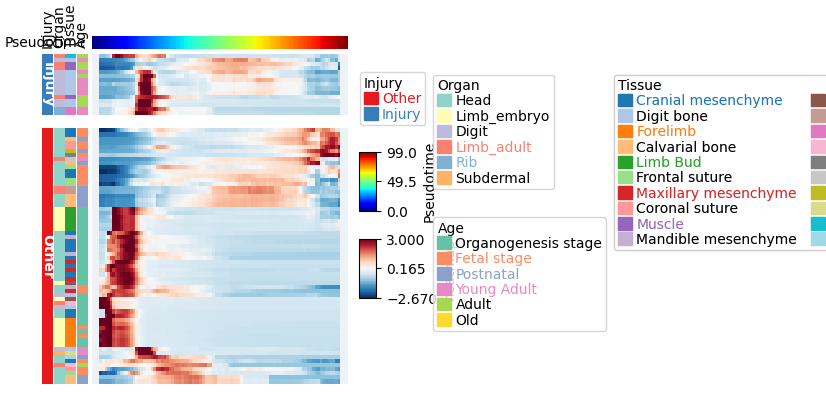

In [633]:
pch.ClusterMapPlotter(scaled_df,col_cluster=False,cmap="RdBu_r",vmax=3,
                      row_split=sampleDf2.InjuryState,left_annotation=row_ha,
                      top_annotation=col_ha,row_split_gap=3
                         )

In [638]:
mdata["milo"]

AnnData object with n_obs × n_vars = 302 × 1984
    obs: 'InjuryState', 'Sample'
    var: 'index_cell', 'kth_distance', 'null', 'group1_cpm', 'group2_cpm', 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'SpatialFDR', 'time', 'range_down', 'range_up', 'Accept', 'logChange'
    uns: 'sample_col'
    varm: 'whole_cpm'

In [639]:
groupCPM=mdata["milo"].var[['group1_cpm', 'group2_cpm']]

In [640]:
groupCPM

,group1_cpm,group2_cpm
index_cell,,
Suture2021_Farmer_E17_AGCGTATTCACGCATA-1_1-0_1_1,409.526472,975.868221
Suture2021_Farmer_E17_GGTATTGAGGCCCTTG-1_1-0_1_1,741.583659,4386.507137
Suture2021_Farmer_E17_GGTATTGCAATTCCTT-1_1-0_1_1,1047.697421,1788.049662
Suture2021_Farmer_E17_TACCTTATCTCGTATT-1_1-0_1_1,1303.193439,1584.357746
Suture2021_Farmer_E17_TTAGTTCCATGTCGAT-1_1-0_1_1,704.744969,5273.579282
...,...,...
GTGTCCTAGAATCGAT-1_7,1683.640418,941.062155
AATGCCAAGTGATAGT-1_8,425.005594,1476.855263
AATGGCTCAAGCTCTA-1_8,1244.580877,1872.830215


In [641]:
n=100
permute_point_group={}
for j in range(n):
    point=(j+1)/(n+1)
    mask = (point >= range_data[:, 0]) & (point <= range_data[:, 1])
    group1Array=groupCPM.loc[mask,:]
    group1Mean=np.mean(group1Array,axis=0)
    permute_point_group[j]=group1Mean
groupCpmDf=pd.DataFrame(permute_point_group)
groupCpmDf.columns=groupCpmDf.columns.astype("str")


In [643]:
groupCpmDf=groupCpmDf.T[np.array(groupCpmDf.sum(axis=0)>0)].T

scaled_df_group = groupCpmDf.apply(row_scale, axis=1)

In [642]:
fdr=pd.DataFrame(lenDf['binom_p'])
fdr=-np.log10(fdr+0.00000000001)
diff=pd.DataFrame(lenDf['meanLogChange']).T

In [657]:
fdr=fdr.T

In [661]:
diff.index=diff.index.astype("str")
fdr.index=fdr.index.astype("str")

In [665]:
diff.columns=diff.columns.astype("str")
fdr.columns=fdr.columns.astype("str")

In [674]:
bottonCol=pd.concat([scaled_df_group,diff,fdr],axis=0).T.dropna()

In [675]:
bottonCol

,group1_cpm,group2_cpm,meanLogChange,binom_p
3,-1.789656,-1.633043,-27.471266,11.000000
4,-1.745542,-1.582645,-26.010051,7.970089
5,-1.722238,-1.536546,-25.411124,10.985062
6,-1.721515,-1.461976,-26.040018,11.000000
7,-1.657963,-1.460161,-24.749514,11.000000
...,...,...,...,...
92,-0.803763,0.999891,-9.704269,0.472253
93,-0.818924,0.791954,-9.321303,0.562587
94,-0.818924,0.791954,-9.321303,0.562587
95,-0.838050,0.792990,-9.242456,0.861231


In [677]:

bottom_ha = pch.HeatmapAnnotation(Injury=pch.anno_simple(bottonCol.group1_cpm,cmap='RdBu_r',
                                           add_text=False,text_kws={'color':'black','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=True),
                               Other=pch.anno_simple(bottonCol.group2_cpm,cmap='RdBu_r',
                                           add_text=False,text_kws={'color':'black','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=True),
                               Diff_expression=pch.anno_simple(bottonCol.meanLogChange,cmap='PiYG_r',
                                           add_text=False,text_kws={'color':'black','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=True),
                               FDR=pch.anno_simple(bottonCol.binom_p,cmap='Spectral_r',
                                           add_text=False,text_kws={'color':'black','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=True),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..
Incresing ncol


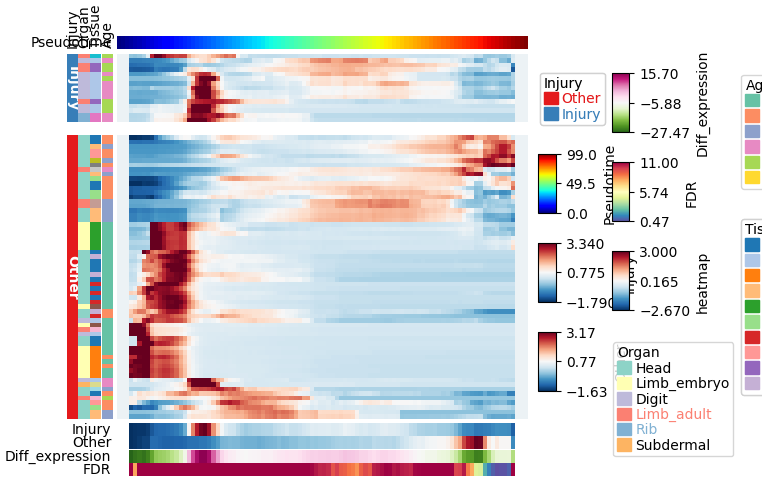

In [680]:
plt.figure(figsize=(6, 5))
pch.ClusterMapPlotter(scaled_df,col_cluster=False,cmap="RdBu_r",vmax=3,
                      row_split=sampleDf2.InjuryState,left_annotation=row_ha,
                      top_annotation=col_ha,row_split_gap=3,bottom_annotation=bottom_ha
                         )
plt.savefig("../result/1.1_fig6/3.4_DA.pdf")

In [682]:
milo_DA=mdata["milo"]

In [683]:
milo_DA.write_h5ad("../process_data/traj_diff/24.3.4_da_milo.h5ad")

In [684]:
scaled_df.to_csv("../process_data/traj_diff/24.3.4_milo_hmData.csv")
bottonCol.to_csv("../process_data/traj_diff/24.3.4_milo_hm_bottomAnno.csv")